In [1]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE, locally_linear_embedding
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
!wget https://box.hu-berlin.de/f/f89d28fa9d4e451eb857/?dl=1 -O download_from_hu

--2020-03-13 06:40:26--  https://box.hu-berlin.de/f/f89d28fa9d4e451eb857/?dl=1
Resolving box.hu-berlin.de (box.hu-berlin.de)... 141.20.184.42
Connecting to box.hu-berlin.de (box.hu-berlin.de)|141.20.184.42|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://box.hu-berlin.de/seafhttp/files/79616a48-86e5-4788-87b7-b83dfe99615e/twoAnnualReports.zip [following]
--2020-03-13 06:40:27--  https://box.hu-berlin.de/seafhttp/files/79616a48-86e5-4788-87b7-b83dfe99615e/twoAnnualReports.zip
Reusing existing connection to box.hu-berlin.de:443.
HTTP request sent, awaiting response... 200 OK
Length: 2143264 (2.0M) [application/zip]
Saving to: ‘download_from_hu’

download_from_hu    100%[===================>]   2.04M  1.84MB/s    in 1.1s    

2020-03-13 06:40:28 (1.84 MB/s) - ‘download_from_hu’ saved [2143264/2143264]



In [2]:
com1 = pd.read_pickle("./outputs 2/China Star_Sustainability Report.pkl")
com2 = pd.read_pickle("./outputs 2/Yongnam Annual Report 2010.pkl")

In [3]:
com1 = com1[com1.punc==False]
com1 = com1[com1.stopwords==False]
com2 = com2[com2.punc==False]
com2 = com2[com2.stopwords==False]

In [4]:
words = []
vectors = []
for i, word in enumerate(set(com1.token)):
    tm_df = com1[com1.token==word]
    tm_mat = np.matrix(tm_df.vector.to_list())
    tm_mat = tm_mat.mean(0)
    words.append(word)
    vectors.append(np.array(tm_mat)[0])

In [5]:
df1 = pd.DataFrame({'words':words, 'vector':vectors})

In [6]:
words2 = []
vectors2 = []
for i, word in enumerate(set(com2.token)):
    tm_df = com2[com2.token==word]
    tm_mat = np.matrix(tm_df.vector.to_list())
    tm_mat = tm_mat.mean(0)
    words2.append(word)
    vectors2.append(np.array(tm_mat)[0])

In [7]:
df2 = pd.DataFrame({'words':words2, 'vector':vectors2})

In [8]:
# prepare for plotting
lle = locally_linear_embedding(np.matrix(df1.vector.to_list()), n_components=2, n_neighbors=12)
lle = lle[0]
lle2 = locally_linear_embedding(np.matrix(df2.vector.to_list()), n_components=2, n_neighbors=12)
lle2 = lle2[0]

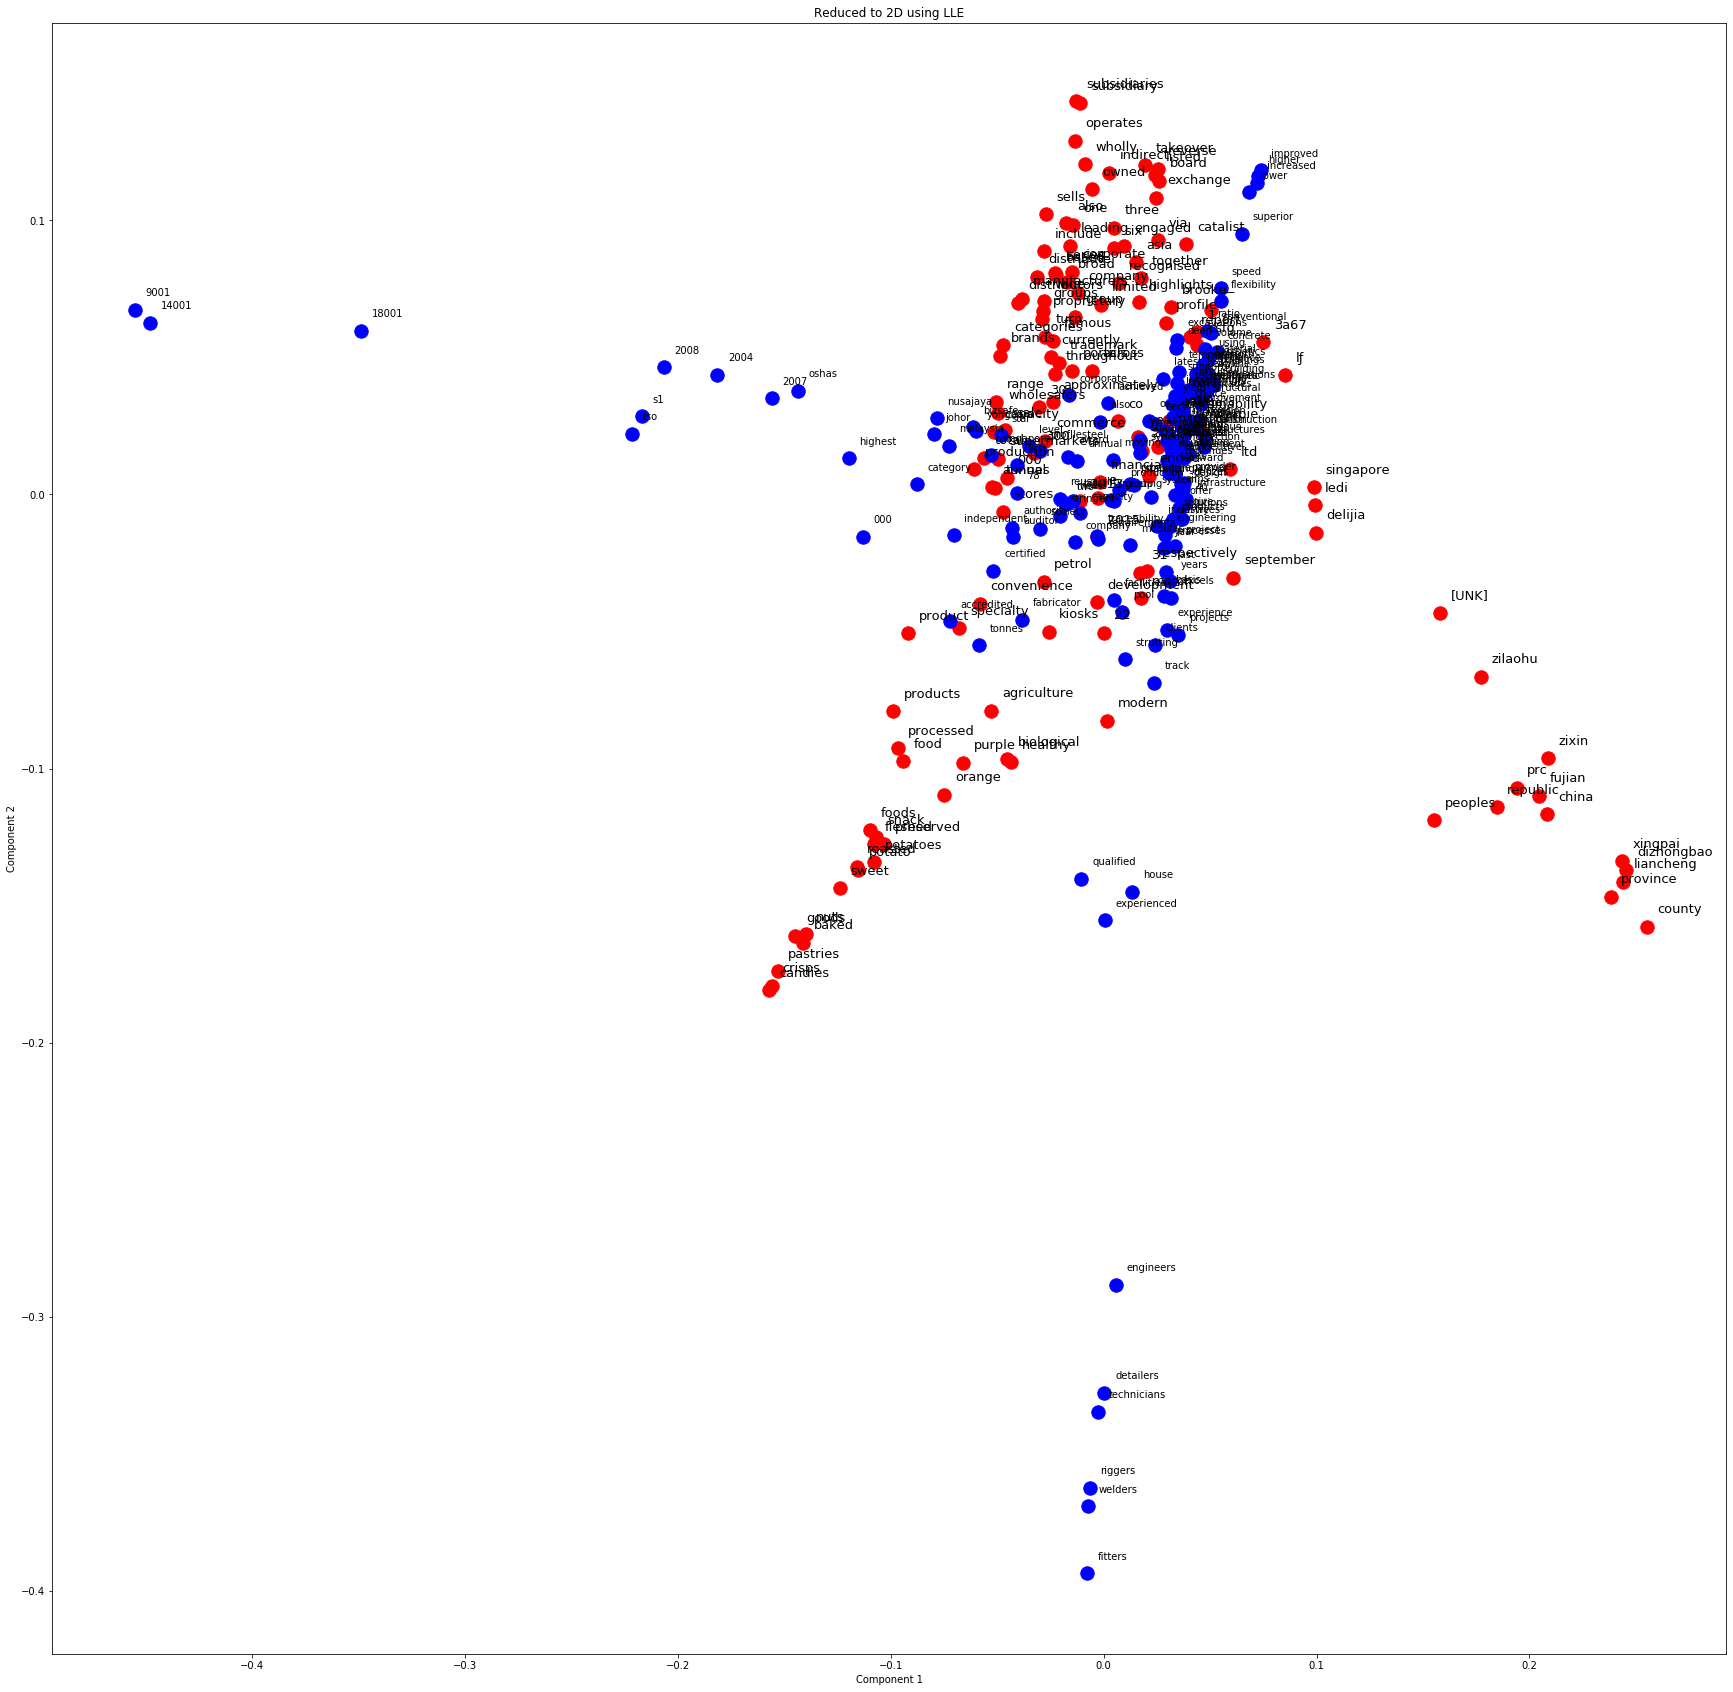

In [13]:
fig = plt.figure(figsize=(30, 30))
for i,t in enumerate(df1.words):
    x = lle[i,0]
    y = lle[i,1]
    plt.scatter(x, y, marker='o', color='red', s=180)
    plt.text(x+0.005, y+0.005, t, fontsize=13)
    
for i,t in enumerate(df2.words):
    x = lle2[i,0]
    y = lle2[i,1]
    plt.scatter(x, y, marker='o', color='blue', s=180)
    plt.text(x+0.005, y+0.005, t, fontsize=10)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Reduced to 2D using LLE')
plt.savefig('./LLE_BERT.png', transparent=True, facecolor=fig.get_facecolor())
plt.show()

In [14]:
from gensim.models.word2vec import Word2Vec
import gensim.downloader as api

In [15]:
model = api.load("glove-wiki-gigaword-50")

In [16]:
words3 = []
vectors3 = []
for i, word in enumerate(set(com1.token)):
    tm_df = com1[com1.token==word]
    words3.append(word)
    try:
        vectors3.append(model[word])
    except:
        vectors3.append([0]*50)

In [17]:
words4 = []
vectors4 = []
for i, word in enumerate(set(com2.token)):
    tm_df = com2[com2.token==word]
    words4.append(word)
    try:
        vectors4.append(model[word])
    except:
        vectors4.append([0]*50)

In [18]:
df3 = pd.DataFrame({'words':words3, 'vector':vectors3})
df4 = pd.DataFrame({'words':words4, 'vector':vectors4})

In [19]:
lle3 = locally_linear_embedding(np.matrix(df3.vector.to_list()), n_components=2, n_neighbors=12)
lle3 = lle3[0]
lle4 = locally_linear_embedding(np.matrix(df4.vector.to_list()), n_components=2, n_neighbors=12)
lle4 = lle4[0]

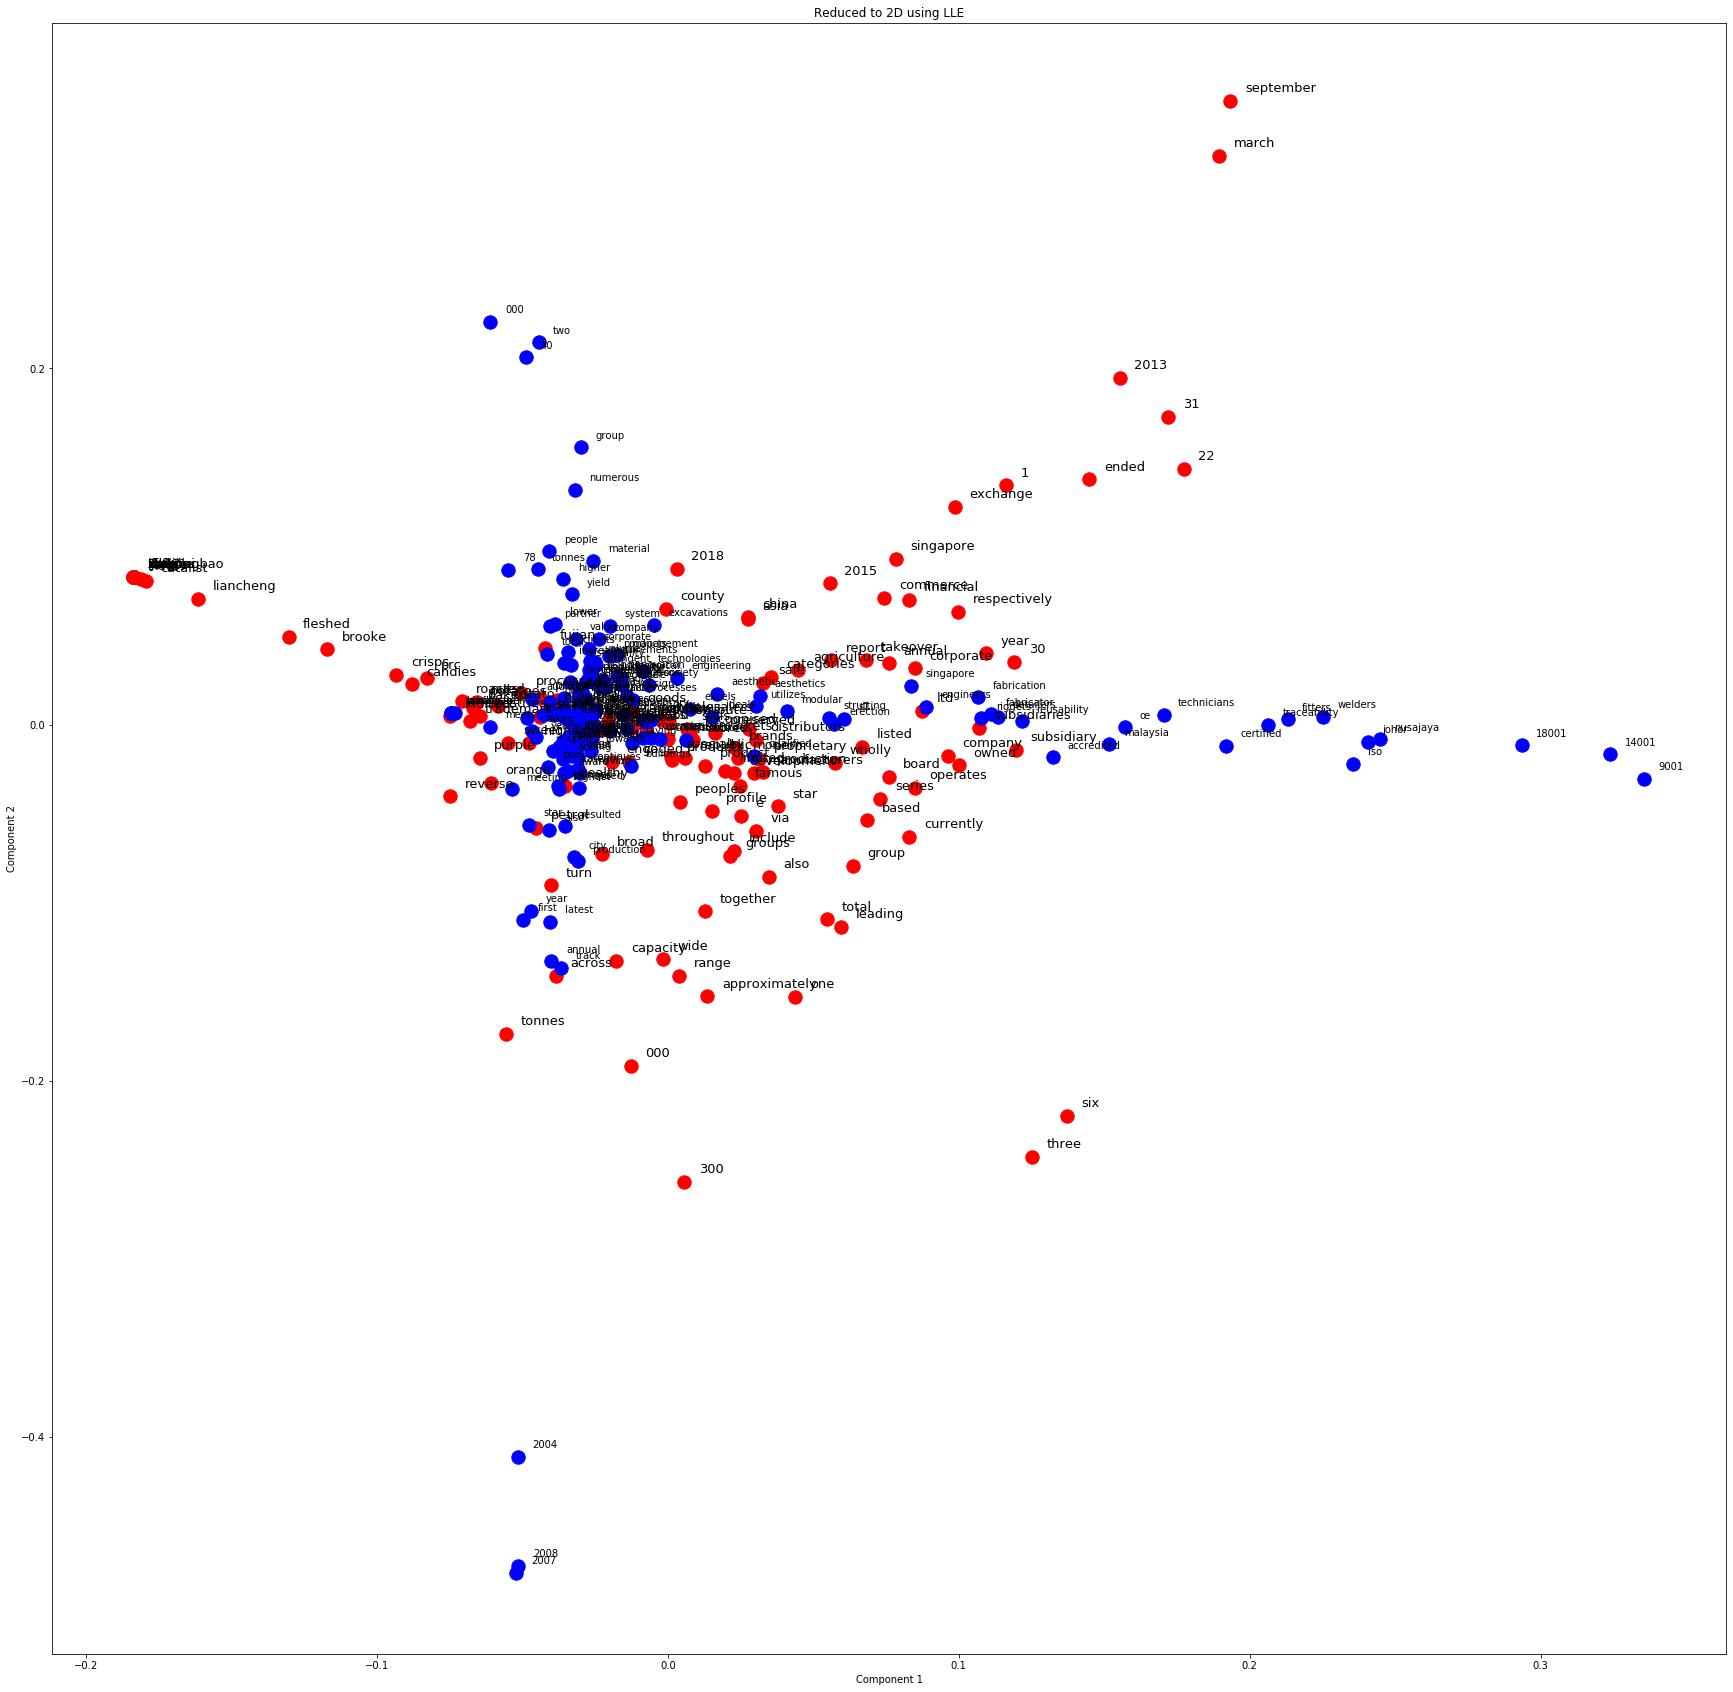

In [20]:
fig = plt.figure(figsize=(30, 30))
for i,t in enumerate(df3.words):
    x = lle3[i,0]
    y = lle3[i,1]
    plt.scatter(x, y, marker='o', color='red', s=180)
    plt.text(x+0.005, y+0.005, t, fontsize=13)
    
for i,t in enumerate(df4.words):
    x = lle4[i,0]
    y = lle4[i,1]
    plt.scatter(x, y, marker='o', color='blue',s=180)
    plt.text(x+0.005, y+0.005, t, fontsize=10)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Reduced to 2D using LLE')
plt.savefig('./LLE_glove.png', transparent=True)
plt.show()

In [21]:
from gensim.models.keyedvectors import KeyedVectors
model_w2v = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)
# model = Word2Vec.load('GoogleNews-vectors-negative300.bin.gz')

In [22]:
words5 = []
vectors5 = []
for i, word in enumerate(set(com1.token)):
    tm_df = com1[com1.token==word]
    words5.append(word)
    try:
        vectors5.append(model_w2v[word])
    except:
        vectors5.append([0]*300)

In [23]:
words6 = []
vectors6 = []
for i, word in enumerate(set(com2.token)):
    tm_df = com2[com2.token==word]
    words6.append(word)
    try:
        vectors6.append(model_w2v[word])
    except:
        vectors6.append([0]*300)

In [32]:
df5 = pd.DataFrame({'words':words5, 'vector':vectors5})
df6 = pd.DataFrame({'words':words6, 'vector':vectors6})

In [33]:
lle5 = locally_linear_embedding(np.matrix(df5.vector.to_list()), n_components=2, n_neighbors=12)
lle5 = lle5[0]
lle6 = locally_linear_embedding(np.matrix(df6.vector.to_list()), n_components=2, n_neighbors=12)
lle6 = lle6[0]

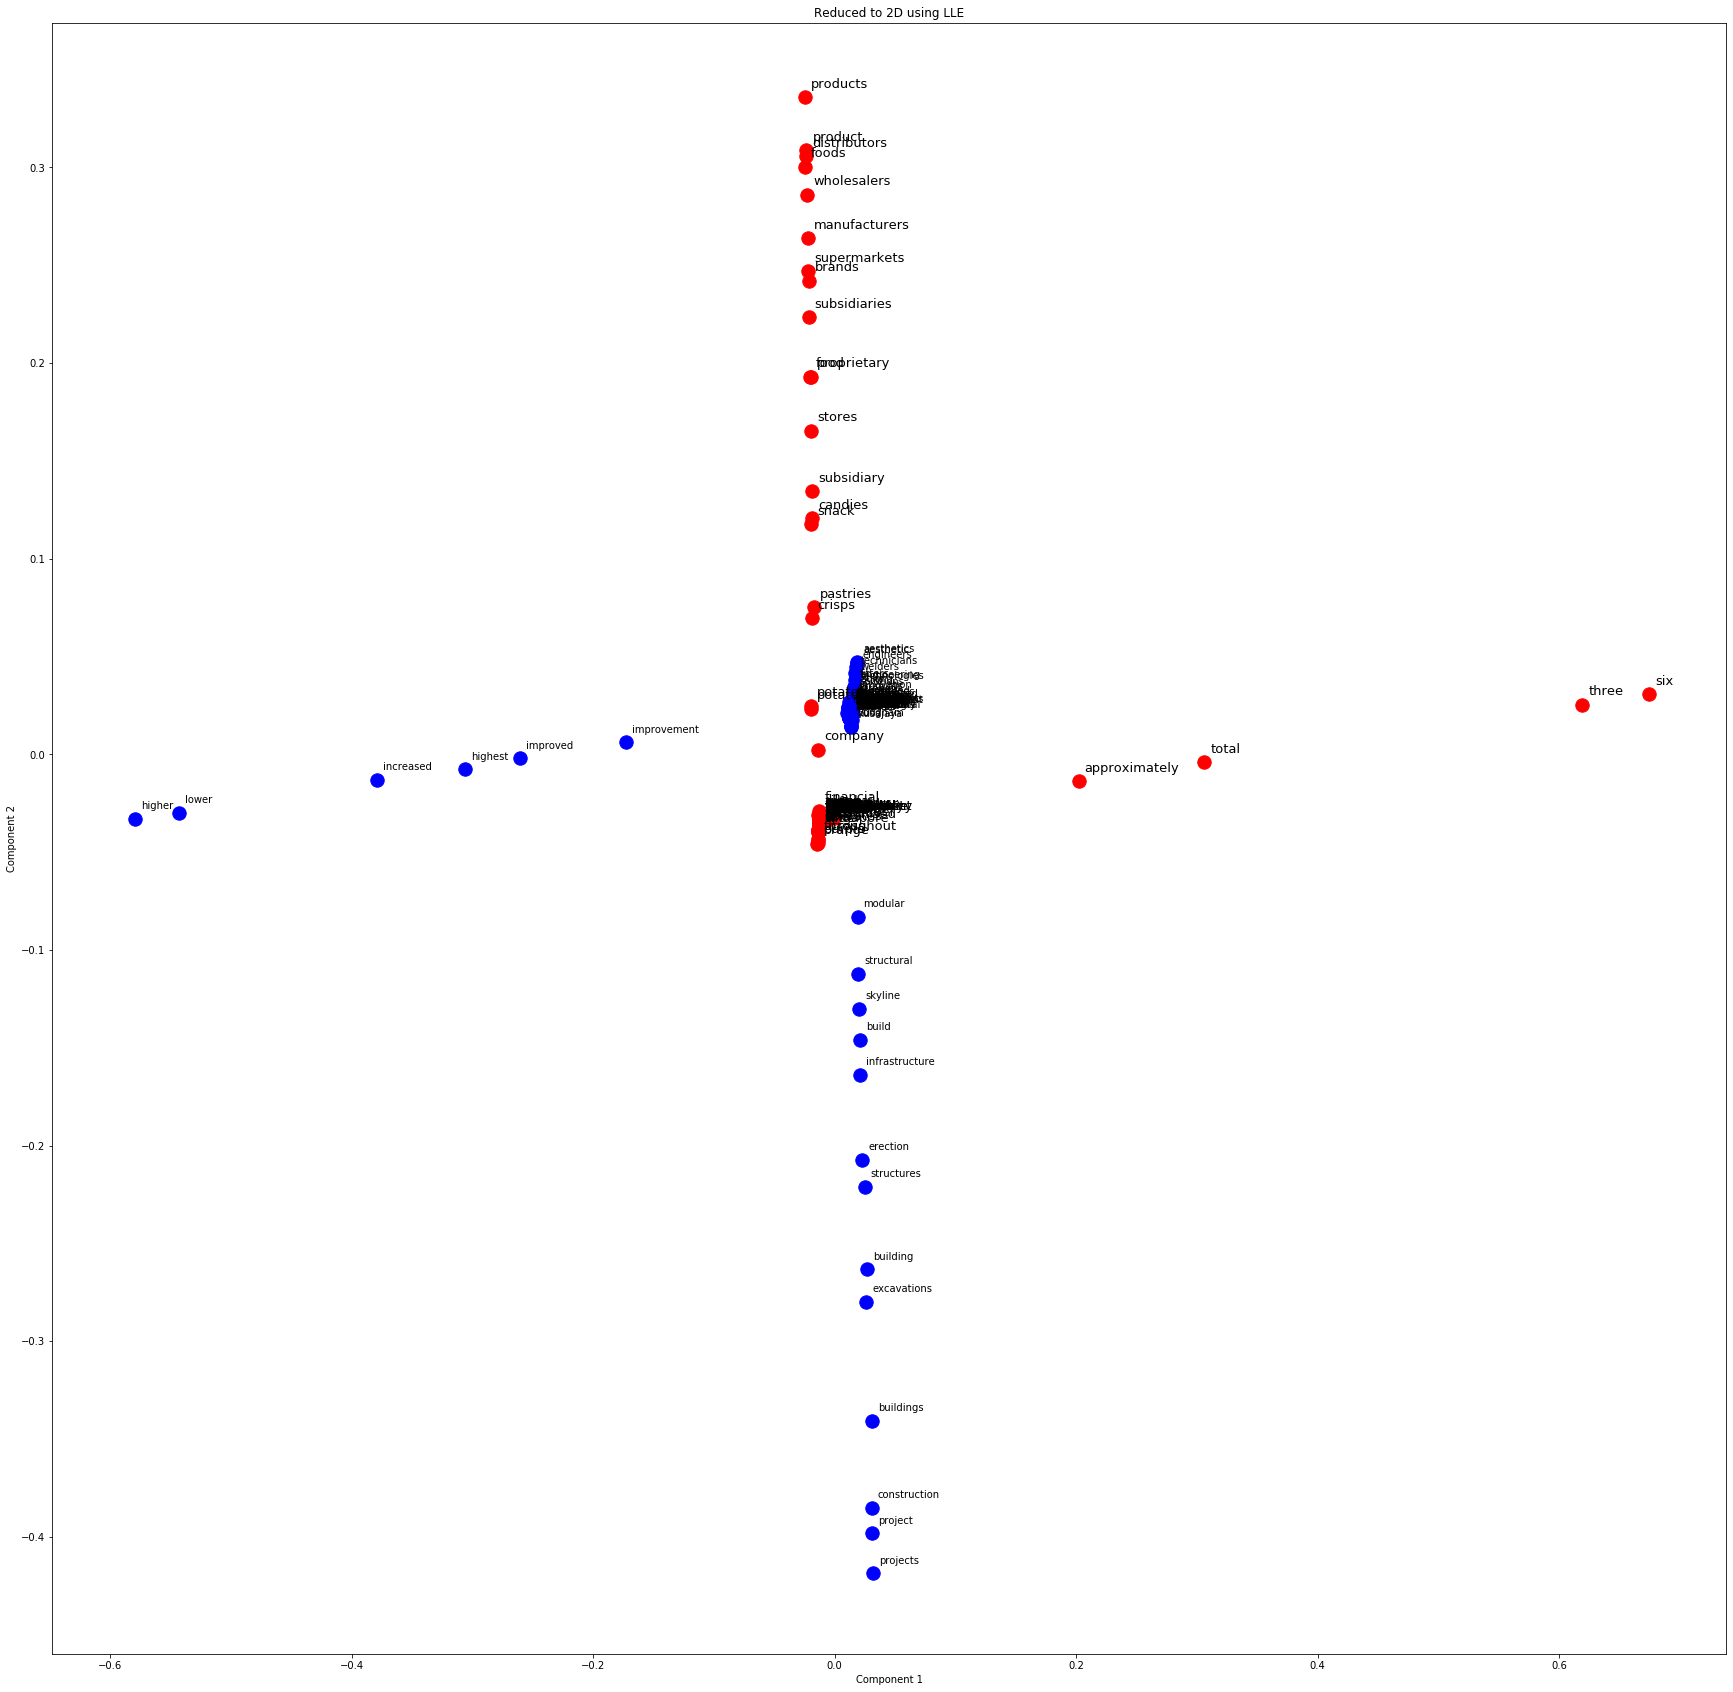

In [34]:
fig = plt.figure(figsize=(30, 30))
for i,t in enumerate(df5.words):
    x = lle5[i,0]
    y = lle5[i,1]
    plt.scatter(x, y, marker='o', color='red', s=180)
    plt.text(x+0.005, y+0.005, t, fontsize=13)
    
for i,t in enumerate(df6.words):
    x = lle6[i,0]
    y = lle6[i,1]
    plt.scatter(x, y, marker='o', color='blue', s=180)
    plt.text(x+0.005, y+0.005, t, fontsize=10)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Reduced to 2D using LLE')
plt.savefig('./LLE_w2v.png', transparent=True)
plt.show()